
# DMT 2023 - Homework 2

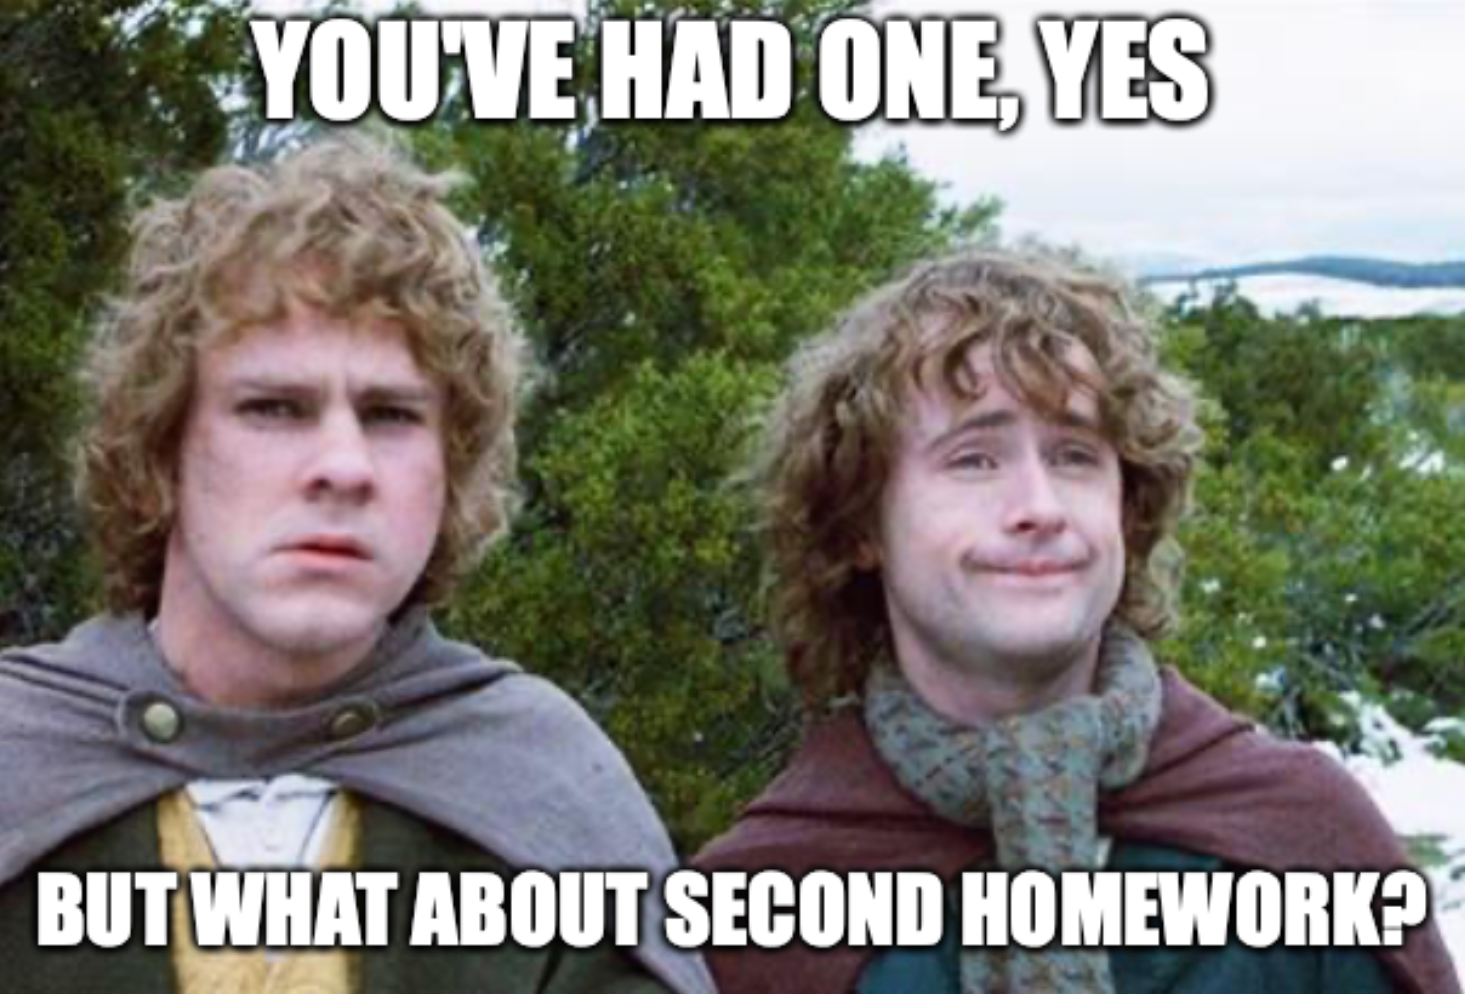


# Instructions for the homework
  > Follow the instructions in the notebook carefully
  


## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * The notebook will be converted to a PDF, so you must use prints and plots that are displayed in the derived PDF.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2023-HW2.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified). In particular, the line `#REMOVE_OUTPUT#` is used in some cells to remove the output of those cells when the notebook is converted to PDF.
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**
    * The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. **Make sure that, when you deliver it, that comment returns to line \<TOT>.** DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ------------YOUR TEXT STARTS HERE------------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ------------YOUR TEXT STARTS HERE------------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)

## Group composition:

Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Becchetti, Luca, 123456

Siciliano, Federico, 987654

------------YOUR TEXT STARTS HERE------------



<div style="page-break-after: always; visibility: hidden">

Fiorenza, Gianmarco 2086297

Girolami, Mattia 2076424



\pagebreak
</div>

## Homework 2
The homework consists of two parts:

  1. PageRank

  and

  2. Recommendation System

> Ensure that the notebook can be faithfully reproduced by anyone (hint: pseudo random number generation).

> If you need to set a random seed, set it to `24`.

# Part 1
In this part of the homework, you have to deal with the PageRank algorithm.

Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown
from bs4 import BeautifulSoup
#YOUR CODE STARTS HERE#
!pip install scikit-network
import pandas as pd
import numpy as np
import pickle
from sknetwork.utils import get_neighbors
from sknetwork.ranking import PageRank
import pickle
from IPython.display import display_html

#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Part 1.1
The data you need to process comes from the book *Le Morte D'Arthur* by Thomas Malory.
The dataset you need to build should be an unweighted and undirected graph, where nodes represent characters from the book and an edge connects two characters in the graph if their names appeared at least one time in the same chapter.

Using this dataset, you must then run various PageRank algorithms.

### 1.1.1
Download the data from the Drive link (code already provided).

In [ ]:
#REMOVE_OUTPUT#
!gdown 1zHgvidy9FvhZvE68S0mXWkoF-hHMpiUL
!gdown 1VjpTkFcbfaLIi4TXVafokW9e_bvGnfut

Downloading...
From: https://drive.google.com/uc?id=1zHgvidy9FvhZvE68S0mXWkoF-hHMpiUL
To: /content/The Project Gutenberg eBook of Le Morte D’Arthur, Volume I (of II), by Thomas Malory.html
100% 964k/964k [00:00<00:00, 591MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VjpTkFcbfaLIi4TXVafokW9e_bvGnfut
To: /content/The Project Gutenberg eBook of Le Morte D’Arthur, Volume II (of II), by Thomas Malory.html
100% 1.10M/1.10M [00:00<00:00, 622MB/s]


### 1.1.2
Parse the HTML. **Part** of code already provided: follow the comments to complete the code.


In [ ]:
with open('The Project Gutenberg eBook of Le Morte D’Arthur, Volume I (of II), by Thomas Malory.html') as fp:
    vol1 = BeautifulSoup(fp, 'html.parser')
with open('The Project Gutenberg eBook of Le Morte D’Arthur, Volume II (of II), by Thomas Malory.html') as fp:
    vol2 = BeautifulSoup(fp, 'html.parser')

def clean_text(txt):
    words_to_put_space_before = [".",",",";",":","’","'"]
    words_to_lowercase = ["First","How","Some","Yet","Of","A","The","What","Fifth"]

    app = txt.replace("\n"," ")
    for word in words_to_put_space_before:
        app = app.replace(word," "+word)
    for word in words_to_lowercase:
        app = app.replace(word+" ",word.lower()+" ")
    return app.strip()

def parse_html(soup):
    titles = []
    texts = []
    for chapter in soup.find_all("h3"):
        chapter_title = chapter.text
        if "CHAPTER" in chapter_title:
            chapter_title = clean_text("".join(chapter_title.split(".")[1:]))
            titles.append(chapter_title)

            chapter_text = [p.text for p in chapter.findNextSiblings("p")]
            chapter_text = clean_text(" ".join(chapter_text))
            texts.append(chapter_text)
    return titles, texts

In [ ]:
#YOUR CODE STARTS HERE#
#Extract all the chapters' titles and texts from the two volumes
titles = parse_html(vol1)[0] + parse_html(vol2)[0]
texts = [ clean_text(x) for x in parse_html(vol1)[1] + parse_html(vol2)[1]]





#Transform the list into a pandas DataFrame.
books_df = pd.DataFrame({'titles': titles, 'texts': texts})







#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print the first 8 rows of the DataFrame.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
books_df.head(8)






#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

,titles,texts
0,"first , how Uther Pendragon sent for the duke ...","It befell in the days of Uther Pendragon , wh..."
1,how Uther Pendragon made war on the duke of Co...,"Then Ulfius was glad , and rode on more than ..."
2,of the birth of King Arthur and of his nurture,Then Queen Igraine waxed daily greater and gre...
3,of the death of King Uther Pendragon,Then within two years King Uther fell sick of ...
4,"how Arthur was chosen king , and of wonders an...",Then stood the realm in great jeopardy long wh...
5,how King Arthur pulled out the sword divers times,"Now assay , said Sir Ector unto Sir Kay . An..."
6,"how King Arthur was crowned , and how he made ...",And at the feast of Pentecost all manner of me...
7,"how King Arthur held in Wales , at a Pentecost...","Then the king removed into Wales , and let cr..."


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.3
Extract character's names from the **titles** only. **Part** of code already provided: follow the comments to complete the code.

In [ ]:
all_characters = set()
def extract_character_names_from_string(string_to_parse):
    special_tokens = ["of","the","le","a","de"]

    remember = ""
    last_is_special_token = False

    tokens = string_to_parse.split(" ")
    characters_found = set()
    for i,word in enumerate(tokens):
        if word[0].isupper() or (remember!="" and word in special_tokens):
            #word = word.replace("'s","").replace("’s","")
            last_is_special_token = False
            if remember!="":
                if word in special_tokens:
                    last_is_special_token = True
                remember = remember+" "+word
            else: remember = word
        else:
            if remember!="":
                if last_is_special_token:
                    for tok in special_tokens:
                        remember = remember.replace(" "+tok,"")
                characters_found.add(remember)
            remember = ""
            last_is_special_token = False
    return characters_found

#all_characters = set([x for x in all_characters if x[-2:]!="'s"])

In [ ]:
#YOUR CODE STARTS HERE#
#Extract all characters' names
for x in books_df['titles']:
  namelist = extract_character_names_from_string(x)
  for n in namelist:
    all_characters.add(n)







#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Print the names of all the kings (i.e. characters with `King` in their name).

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
for x in all_characters:
  if 'King' in x:
    print(x)




#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

King Pellam
King Mordrains
King Brandegore
King Solomon
Maimed King
King Mark
King Rience
King
King Evelake
King Uriens
King of the Land of Cameliard
King Leodegrance
King of England
King Arthur
King Pellinore
King Pelles
King Howel of Brittany
King Ban
King Lot of Orkney
King Anguish of Ireland
King Bors
King Lot
King Bagdemagus
King Mark of Cornwall
King Pelleas


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.4
Some names refer to the same characters (e.g. `'Arthur' = 'King Arthur'`). A function is provided to extract the disambiguation dictionary: each key represents a name and the value represents the true character name (e.g. `{'Arthur': 'King-Arthur', 'King': 'King-Arthur', 'Bedivere':'Sir Bedivere'}`). Disambiguation sets, i.e. a list with sets representing the multiple names of a single character, are also provided.

> There may be some mistakes, but it does not matter (e.g. `'Cornwall' = 'King of Cornwall'`)

In [ ]:
disambiguate_to = {}
for x in all_characters:
    for y in all_characters:
        if x in y and x!=y:
            if x in disambiguate_to:
                previous_y = disambiguate_to[x]
                if len(y)>len(previous_y): disambiguate_to[x] = y
            else:
                disambiguate_to[x] = y
disambiguate_to.update({"King": "King Arthur",
                        "King of England": "King Arthur",
                        "Queen": "Queen Guenever",
                        "Sir Lancelot": "Sir Launcelot"})

disambiguate_sets = []
for x,y in disambiguate_to.items():
    inserted = False
    for z in disambiguate_sets:
        if x in z or y in z:
            z.add(x); z.add(y)
            inserted = True
    if not inserted:
        disambiguate_sets.append(set([x,y]))

while True:
    to_remove,to_add = [],[]
    for i1,s1 in enumerate(disambiguate_sets[:-1]):
        for s2 in disambiguate_sets[i1+1:]:
            if len(s1.intersection(s2))>0:
                to_remove.append(s1)
                to_remove.append(s2)
                to_add.append(s1.union(s2))
    if len(to_add)>0:
        for rm in to_remove:
            disambiguate_sets.remove(rm)
        for ad in to_add:
            disambiguate_sets.append(ad)
    else: break

### 1.1.5
Prepare the dataset for the PageRank algorithm.

> It should be a Pandas DataFrame with two fields: `character_1`, `character_2`.

> Each row must contain two characters' names if they appear together in at least one chapter **text**.

> The relevant characters are only those extracted in Part 1.1.3.

> Keep in mind that some characters have alternative names, but they refer to the same character.

> The dataset must not contain repetitions.

In [ ]:
#YOUR CODE STARTS HERE#
disambiguate_dict, todropidx = {}, []
pagerank_df = pd.DataFrame(columns=['character_1','character_2'])
disambiguate_dict = {}
for sets in disambiguate_sets:
  set_ = list(sets)
  disambiguate_dict[set_[0]] = (set_)
for char in all_characters:
    if all(char not in values for values in disambiguate_dict.values()):
        disambiguate_dict[char] = [char]
for key_1, value_1 in disambiguate_dict.items():
  for key_2, value_2 in disambiguate_dict.items():
    for alt_name_1 in value_1:
      for alt_name_2 in value_2:
        for txt in books_df['texts']:
          if(alt_name_1 in txt and alt_name_2 in txt):
            if key_1 <= key_2:
              pagerank_df = pd.concat( [pagerank_df, pd.DataFrame( [{'character_1': key_1, 'character_2': key_2}]) ], ignore_index= True)
            else:
              pagerank_df = pd.concat( [pagerank_df, pd.DataFrame( [{'character_1': key_2, 'character_2': key_1}]) ], ignore_index= True)
            break
for i in range(len(pagerank_df)):
  if (pagerank_df.iloc[i]['character_1'] == pagerank_df.iloc[i]['character_2']): todropidx.append(i)

pagerank_df = pagerank_df.drop(todropidx)
pagerank_df.drop_duplicates(inplace=True)
pagerank_df = pagerank_df.reset_index(drop=True)

#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Print the rows of the dataset where `Sir Lamorak` appears.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
for k, v in disambiguate_dict.items():                #This for loop is necessary for searching also for all the alternative names of the interested character
  if ('Sir Lamorak') in v: true_name_ = k
lamorak_df = pd.DataFrame(columns=['character_1','character_2'])
for j in range(len(pagerank_df)):
  if (pagerank_df.iloc[j]['character_1'] == true_name_ or pagerank_df.iloc[j]['character_2'] == true_name_):
    lamorak_df = pd.concat( [lamorak_df,  pd.DataFrame([{'character_1': pagerank_df.iloc[j]['character_1'], 'character_2': pagerank_df.iloc[j]['character_2']}]) ], ignore_index= True)
lamorak_df
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

,character_1,character_2
0,Sir Gawaine,Sir Lamorak
1,Sir Epinogris,Sir Lamorak
2,Sir Gaheris,Sir Lamorak
3,Lonazep,Sir Lamorak
4,Sir Beaumains,Sir Lamorak
...,...,...
103,Corsabrin,Sir Lamorak
104,Sir Lamorak,Sir Sagramore le Desirous
105,Sir Lamorak,Sir Turquine
106,Bragwaine,Sir Lamorak


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.6
Print the sorted list of all character names (without duplicates) in ascending alphabetical order.

Print also the length of this list.

In [ ]:
#YOUR CODE STARTS HERE#
for k,v in disambiguate_dict.items():
  for name in v[1:]:
    if name in all_characters: all_characters.remove(name)

sorted_all_char = sorted(list(all_characters))
print("The length of the list is:  ", len(sorted_all_char))
print(sorted_all_char)










#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

The length of the list is:   170
['Abbot', 'Accolon', 'Alice', 'Alisander', 'Almaine', 'Almesbury', 'Andred', 'Anglides', 'Archbishop of Canterbury', 'Avoutres', 'Balan', 'Balin', 'Ban', 'Beale Isoud', 'Beale Pilgrim', 'Benwick', 'Boudwin', 'Bragwaine', 'Camelot', 'Carbonek', 'Carlion', 'Castle of Maidens', 'Castle of Pendragon', 'Chapel Perilous', 'Christmas', 'Constantine', 'Corsabrin', 'Court', 'Dagonet', 'Dame Brisen', 'Dame Elaine', 'Damosel of the Lake', 'David', 'Dover', 'Excalibur', 'Feast of Pentecost', 'Forest Perilous', 'France', 'Galahad', 'Gard', 'Garlon', 'God', 'Gouvernail', 'Great Royalty', 'Griflet', 'Helin le Blank', 'Holy Sangreal', 'Humber', 'Ireland', 'Island', 'Joseph', 'Joyous Isle', 'Kehydius', 'King', 'King Bagdemagus', 'King Bors', 'King Brandegore', 'King Evelake', 'King Howel of Brittany', 'King Leodegrance', 'King Lot', 'King Mark of Cornwall', 'King Mordrains', 'King Pellam', 'King Pelleas', 'King Pellinore', 'King Rience', 'King Solomon', 'King Uriens', '

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.7
Create the adjacency matrix for the graph, assigning to each character a node identifier equal to the index that the character name has in ascending alphabetical order (remember that the first element of a list in Python has index 0).

In [ ]:
#YOUR CODE STARTS HERE#

adjacency_mat = np.zeros((len(sorted_all_char), len(sorted_all_char)), dtype=int)

for k in range(len(pagerank_df)):

  i = sorted_all_char.index(pagerank_df.iloc[k]['character_1'])
  j = sorted_all_char.index(pagerank_df.iloc[k]['character_2'])
  adjacency_mat[i][j] = 1









#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 1.1.8
Compute the PageRank vector for the obtained graph using a damping factor of 0.85.

In [ ]:
#YOUR CODE STARTS HERE#

damping_factor = 0.85

pagerank = PageRank(damping_factor=damping_factor, solver="piteration", n_iter=1000, tol=10**-6)
pagerank_vector = pagerank.fit_transform(adjacency_mat)












#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print the name and the PageRank score of the top-15 characters according to the PageRank score of their associated nodes.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
name__pagerank = dict(zip(sorted_all_char, pagerank_vector))
pagerank_dict = sorted(name__pagerank.items(), key=lambda x:x[1], reverse = True)[:15]
pagerank_top_15 = pd.DataFrame(data = (pagerank_dict), columns = ['Name', 'PageRank'])
pagerank_top_15



#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

,Name,PageRank
0,Wales,0.171477
1,Sir Uwaine,0.060573
2,Surluse,0.050397
3,Sir Tristram de Liones,0.037675
4,Sir Urre,0.027228
5,Sir Turquine,0.027102
6,Winchester,0.020709
7,Sir Tor,0.020088
8,Tintagil,0.017420
9,Sir Sagramore le Desirous,0.017093


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.9
Compute the Topic-specific PageRank vector for the obtained graph using a damping factor of 0.75, by considering as topic the *Queens*: a character belongs to the topic if its name starts with the string `Queen`.

In [ ]:
#YOUR CODE STARTS HERE#
damping_factor = 0.75
pagerank = PageRank(damping_factor=damping_factor, solver="piteration", n_iter=1000, tol=10 ** -6)
topic = 'Queen'
list_of_queen = set()
for k, v in disambiguate_dict.items():
  for name_ in v:
    if 'Queen' in name_:
      list_of_queen.add((sorted_all_char.index(k), k))
list_of_queen = list(list_of_queen.union(set([(sorted_all_char.index(x), x) for x in sorted_all_char if 'Queen' in x])))
topic_landing_probability = {}
for q in list_of_queen:
  topic_landing_probability[q[0]] = 1/len(list_of_queen)


topic_specific_pagerank_vector = pagerank.fit_transform(adjacency_mat, weights=topic_landing_probability)


#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print the name and the PageRank score of the top-16 characters according to the Topic-specific PageRank score of their associated nodes.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#

topic_specific_pagerank_vector = dict(zip(sorted_all_char, topic_specific_pagerank_vector))
topic_pagerank_dict = sorted(topic_specific_pagerank_vector.items(), key=lambda x:x[1], reverse = True)[:16]
pagerank_top_16 = pd.DataFrame(data = (topic_pagerank_dict), columns = ['Name', 'PageRank'])
pagerank_top_16


#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

,Name,PageRank
0,Wales,0.131227
1,Queen Isoud,0.057917
2,Queen Igraine,0.057899
3,Queen Guenever,0.057236
4,Queen of Orkney,0.056988
5,Morgan le Fay,0.056185
6,Sir Uwaine,0.048522
7,Surluse,0.037762
8,Sir Tristram de Liones,0.031228
9,Sir Turquine,0.023664


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.10
Compute the Personalized PageRank vector for the obtained graph using a damping factor of 0.2 for each of the *Knights*: a character belongs to the topic if its name starts with the string `Sir`.

In [ ]:
#YOUR CODE STARTS HERE#
damping_factor = 0.2
pagerank = PageRank(damping_factor=damping_factor, solver="piteration", n_iter=1000, tol=10 ** -6)
list_of_sir = set()
for k, v in disambiguate_dict.items():
  for name_ in v:
    if 'Sir' in name_:
      list_of_sir.add((sorted_all_char.index(k), k))
list_of_sir = list(list_of_sir.union(set([(sorted_all_char.index(x), x) for x in sorted_all_char if 'Sir' in x])))
personalized_landing_probability = {}
for q in list_of_sir:
  personalized_landing_probability[q[0]] = 1

pers_specific_pagerank_vector = pagerank.fit_transform(adjacency_mat, weights = personalized_landing_probability)


pers_specific_pagerank_vector = dict(zip(sorted_all_char, pers_specific_pagerank_vector))
pers_pagerank_dict = sorted(pers_specific_pagerank_vector.items(), key=lambda x:x[1], reverse = True)

output = open('sir_page_rank.pkl', 'wb')
pickle.dump(pers_pagerank_dict, output)
output.close()

pagerank_sir = pd.DataFrame(data = (pers_pagerank_dict), columns = ['Name', 'PageRank'])



pagerank_sir.head(16)
#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

,Name,PageRank
0,Sir Tristram de Liones,0.028476
1,Sir Uwaine,0.025841
2,Sir Palomides,0.020887
3,Sir Urre,0.020181
4,Sir Lancelot,0.020050
5,Sir Turquine,0.019405
6,Sir Tor,0.019368
7,Sir Sagramore le Desirous,0.018936
8,Sir Segwarides,0.018200
9,Sir Lamorak,0.018006


For each of the *Knights*, print the name and the PageRank score of the top-2 characters according to the Personalized PageRank score of their associated nodes.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#


personalized_landing_probability_1_sir = {}
for sir in list_of_sir :

  personalized_landing_probability_1_sir[sir[0]] = 1
  pers_specific_pagerank_vector = pagerank.fit_transform(adjacency_mat, weights = personalized_landing_probability_1_sir)
  pers_specific_pagerank_vector = dict(zip(sorted_all_char, pers_specific_pagerank_vector))
  pers_pagerank_dict = sorted(pers_specific_pagerank_vector.items(), key=lambda x:x[1], reverse = True)[:2]
  pagerank_sir = pd.DataFrame(data = (pers_pagerank_dict), columns = ['Name', 'PageRank'])
  print(f'Top 2 character related to: {sir[1]}')

  print(pagerank_sir.head())
  print('')



#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Top 2 character related to: Sir Ector
        Name  PageRank
0  Sir Ector  0.803111
1      Wales  0.013004

Top 2 character related to: Sir Bliant
         Name  PageRank
0   Sir Ector  0.428099
1  Sir Bliant  0.400923

Top 2 character related to: Sir Lavaine
          Name  PageRank
0    Sir Ector  0.285899
1  Sir Lavaine  0.269848

Top 2 character related to: Sir Lanceor
          Name  PageRank
0    Sir Ector  0.214306
1  Sir Lavaine  0.202280

Top 2 character related to: Sir Tristram de Liones
                     Name  PageRank
0  Sir Tristram de Liones  0.182302
1               Sir Ector  0.171768

Top 2 character related to: Sir Mador
                     Name  PageRank
0  Sir Tristram de Liones  0.154564
1               Sir Ector  0.143126

Top 2 character related to: Sir Carados
                     Name  PageRank
0  Sir Tristram de Liones  0.133696
1               Sir Ector  0.123573

Top 2 character related to: Sir Lamorak
                     Name  PageRank
0  Sir Tristram 

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.11
Compute Topic-specific PageRank for the graph using a damping factor of 0.2. Imagine you are in an **online** context.

The Topic is *Knights* (list of characters defined in step 1.1.7)

In [ ]:
#YOUR CODE STARTS HERE#
pkl_file = open('sir_page_rank.pkl', 'rb')
ppr_sir = pickle.load(pkl_file)
pkl_file.close()

online_topic_specific_pr = {}

for item in ppr_sir:
  if item[0] not in online_topic_specific_pr:
      online_topic_specific_pr[item[0]] = 0.
  online_topic_specific_pr[item[0]] += item[1] / len(ppr_sir)







#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print the name and the PageRank score of the top-8 characters according to the Topic-specific PageRank score of their associated nodes.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
topic_offline_df = pd.DataFrame(data=online_topic_specific_pr.items(), columns=["Character","Page Rank"])
topic_offline_df.head(8)





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

,Character,Page Rank
0,Sir Tristram de Liones,0.000168
1,Sir Uwaine,0.000152
2,Sir Palomides,0.000123
3,Sir Urre,0.000119
4,Sir Lancelot,0.000118
5,Sir Turquine,0.000114
6,Sir Tor,0.000114
7,Sir Sagramore le Desirous,0.000111


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 1.2

### 1.2.1
Given a graph with $n$ nodes:
* Node $A$ is connected to all the other nodes.
* There are no other edges.

What will be the PageRank of node $A$?

Does the result depend on the damping factor or number of nodes $n$? If yes, please describe the value of PageRank as both vary.

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------

PageRank is affected by damping factor, not by number of nodes. As damping factor decreases, PageRank of A becomes similar to others; as it increases, PageRank of A approaches 1. No effect of number of nodes since PageRank of A depends on sum of other nodes' PageRank connected only to A, indeed with the same page rank.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

# Part 2
In this part of the homework, you have to improve the performance of various recommendation-systems by using non-trivial algorithms and also by performing the tuning of the hyper-parameters.

Import here **ALL** the Python packages that you need for Part 2.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
!pip install surprise
from surprise import *
from surprise.model_selection import *
from surprise.prediction_algorithms.random_pred import NormalPredictor
from surprise.prediction_algorithms.baseline_only import BaselineOnly
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
import multiprocessing
import numpy as np
import pandas as pd
from scipy.stats import randint
#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Part 2.1
Apply **all** algorithms for recommendation made available by “Surprise” libraries on the provided dataset:
* **with their default configuration**
* using **ALL** CPU-cores available on the remote machine by specifying the value in an **explicit** way with an integer number.

You also need to:
* use Alternating Least Squares as baselines estimation method
* use cosine similarity as similarity measure
* use item-item similarity
* if a number of iterations is to be set, it must be 25

> Not all options may be applicable to all algorithms

### 2.1.1
Prepare the dataset for the Recommendation algorithms.

> It should be a Pandas DataFrame with three fields: `Ruler`, `Knight`, `Rating`.

> Each row must contain two characters' names if they appear together in at least one chapter **text**.

> The relevant characters are only those extracted in Part 1.1.3.

> Keep in mind that some characters have alternative names, but they refer to the same character.

> The dataset must not contain repetitions.

Also:

> A `Ruler` is a character whose name starts with `King` or `Queen`.

> A `Knight` is a character whose ame starts with `Knight` or `Sir`.

> The `Rating` represents the number of chapters in which two characters appear together.

In [ ]:
#YOUR CODE STARTS HERE#
recommendation_df = pd.DataFrame(columns=['Ruler', 'Knight', 'Rating'])
disambiguate_dict={}
for sets in disambiguate_sets:
  set_ = list(sets)
  disambiguate_dict[set_[0]] = (set_)
for char in all_characters:
    if all(char not in values for values in disambiguate_dict.values()):
        disambiguate_dict[char] = [char]

for k_1 in disambiguate_dict.keys():
  for alt_name_1 in disambiguate_dict[k_1]:
    if 'Queen' in alt_name_1 or 'King' in alt_name_1:
      for k_2 in disambiguate_dict.keys():
        for alt_name_2 in disambiguate_dict[k_2]:
          if 'Knight' in alt_name_2 or 'Sir' in alt_name_2:
            for txt in books_df['texts']:
              for alt_1 in disambiguate_dict[k_1]:
                if alt_1 in txt:
                  for alt_2 in disambiguate_dict[k_2]:
                    if alt_2 in txt:
                      recommendation_df = pd.concat( [recommendation_df, pd.DataFrame( [{'Ruler': k_1, 'Knight': k_2, 'Rating' : 1}]) ], ignore_index= True)
                      pass

grouped = recommendation_df.groupby(['Ruler','Knight']).sum()
final_recommendation_df = grouped.reset_index()
final_recommendation_df.to_csv(r'recommendation_df.csv',index=False)

#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 2.1.2
Inspect the dataset:

1. For each field, print the minimum and maximum values.

2. Print also the rows of the dataset where `Sir Accolon` appears.


In [ ]:
#YOUR CODE STARTS HERE#
name = 'Sir Accolon'
if name not in disambiguate_dict.keys():
  for k,v in disambiguate_dict.items():
    if name in v:
      name = k
      break
df_ruler = final_recommendation_df.groupby(['Ruler']).agg({'Rating': ['min', 'max']}).reset_index()
df_knight = final_recommendation_df.groupby(['Knight']).agg({'Rating': ['min', 'max']}).reset_index()
df_accolon = final_recommendation_df.loc[final_recommendation_df['Knight'] == name]
display_html(df_ruler.style.set_table_attributes("style='display:inline'").set_caption('Rulers')._repr_html_()+ "&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;" +
             df_knight.style.set_table_attributes("style='display:inline'").set_caption('Knights')._repr_html_()+ "&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;" +
             df_accolon.style.set_table_attributes("style='display:inline'").set_caption('Sir Accolon')._repr_html_(), raw=1)
#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Rulers 
 
 
   
 Ruler 
 Rating 
 
 
   
 
 min 
 max 
 
 
 
 
 0 
 Ban 
 2 
 100 
 
 
 1 
 Ireland 
 1 
 176 
 
 
 2 
 King 
 3 
 7566 
 
 
 3 
 King Bagdemagus 
 1 
 128 
 
 
 4 
 King Bors 
 1 
 234 
 
 
 5 
 King Brandegore 
 1 
 4 
 
 
 6 
 King Evelake 
 1 
 8 
 
 
 7 
 King Howel of Brittany 
 1 
 8 
 
 
 8 
 King Leodegrance 
 4 
 4 
 
 
 9 
 King Lot 
 2 
 54 
 
 
 10 
 King Mark of Cornwall 
 2 
 1240 
 
 
 11 
 King Mordrains 
 1 
 2 
 
 
 12 
 King Pellam 
 2 
 4 
 
 
 13 
 King Pellinore 
 1 
 30 
 
 
 14 
 King Rience 
 1 
 4 
 
 
 15 
 King Solomon 
 1 
 2 
 
 
 16 
 King Uriens 
 1 
 24 
 
 
 17 
 Maimed King 
 1 
 7 
 
 
 18 
 Morgan le Fay 
 1 
 224 
 
 
 19 
 Pelles 
 2 
 144 
 
 
 20 
 Queen Guenever 
 2 
 2176 
 
 
 21 
 Queen Igraine 
 1 
 4 
 
 
 22 
 Queen Isoud 
 1 
 68 
 
 
 23 
 Queen of Orkney 
 1 
 24 
 
 
 
       
 
 Knights 
 
 
   
 Knight 
 Rating 
 
 
   
 
 min 
 max 
 
 
 
 
 0 
 Accolon 
 4 
 306 
 
 
 1 
 Dagonet 
 4 
 81 
 
 
 2 
 Galahad 
 1 
 525 
 
 
 3 
 Knight of the Red Launds 
 1 
 123 
 
 
 4 
 Lionel 
 2 
 435 
 
 
 5 
 Mordred 
 1 
 729 
 
 
 6 
 Percivale 
 1 
 510 
 
 
 7 
 Red Knight 
 1 
 141 
 
 
 8 
 Round Table 
 1 
 660 
 
 
 9 
 Sir Aglovale 
 1 
 93 
 
 
 10 
 Sir Agravaine 
 1 
 210 
 
 
 11 
 Sir Alisander 
 1 
 45 
 
 
 12 
 Sir Amant 
 2 
 27 
 
 
 13 
 Sir Archade 
 2 
 6 
 
 
 14 
 Sir Beaumains 
 1 
 267 
 
 
 15 
 Sir Bedivere 
 1 
 120 
 
 
 16 
 Sir Belliance 
 2 
 18 
 
 
 17 
 Sir Berluse 
 1 
 18 
 
 
 18 
 Sir Blamore 
 1 
 171 
 
 
 19 
 Sir Bleoberis 
 1 
 297 
 
 
 20 
 Sir Bliant 
 2 
 3 
 
 
 21 
 Sir Bors 
 1 
 489 
 
 
 22 
 Sir Breunor 
 4 
 12 
 
 
 23 
 Sir Breuse Saunce Pité 
 2 
 105 
 
 
 24 
 Sir Brian 
 1 
 60 
 
 
 25 
 Sir Carados 
 1 
 54 
 
 
 26 
 Sir Colgrevance 
 1 
 27 
 
 
 27 
 Sir Dinadan 
 4 
 846 
 
 
 28 
 Sir Ector 
 1 
 441 
 
 
 29 
 Sir Elias 
 2 
 36 
 
 
 30 
 Sir Epinogris 
 2 
 99 
 
 
 31 
 Sir Frol 
 18 
 18 
 
 
 32 
 Sir Gaheris 
 1 
 699 
 
 
 33 
 Sir Galahalt 
 2 
 57 
 
 
 34 
 Sir Galihodin 
 1 
 117 
 
 
 35 
 Sir Gareth 
 1 
 423 
 
 
 36 
 Sir Gawaine 
 2 
 2193 
 
 
 37 
 Sir Kay 
 1 
 438 
 
 
 38 
 Sir Lamorak 
 4 
 1296 
 
 
 39 
 Sir Lancelot 
 2 
 7566 
 
 
 40 
 Sir Lanceor 
 1 
 42 
 
 
 41 
 Sir Lavaine 
 2 
 210 
 
 
 42 
 Sir Mador 
 1 
 93 
 
 
 43 
 Sir Marhaus 
 1 
 174 
 
 
 44 
 Sir Meliagaunce 
 4 
 18 
 
 
 45 
 Sir Meliagrance 
 2 
 54 
 
 
 46 
 Sir Nabon 
 1 
 30 
 
 
 47 
 Sir Palomides 
 2 
 1155 
 
 
 48 
 Sir Pedivere 
 1 
 18 
 
 
 49 
 Sir Pelleas 
 1 
 102 
 
 
 50 
 Sir Persant 
 6 
 408 
 
 
 51 
 Sir Sadok 
 1 
 72 
 
 
 52 
 Sir Safere 
 1 
 138 
 
 
 53 
 Sir Sagramore le Desirous 
 1 
 93 
 
 
 54 
 Sir Segwarides 
 1 
 96 
 
 
 55 
 Sir Suppinabiles 
 6 
 9 
 
 
 56 
 Sir Tor 
 1 
 132 
 
 
 57 
 Sir Tristram de Liones 
 4 
 4824 
 
 
 58 
 Sir Turquine 
 1 
 57 
 
 
 59 
 Sir Urre 
 1 
 81 
 
 
 60 
 Sir Uwaine 
 1 
 222 
 
 
 
       
 
 Sir Accolon 
 
 
   
 Ruler 
 Knight 
 Rating 
 
 
 
 
 78 
 King 
 Accolon 
 306 
 
 
 257 
 King Lot 
 Accolon 
 4 
 
 
 386 
 King Uriens 
 Accolon 
 18 
 
 
 435 
 Morgan le Fay 
 Accolon 
 68 
 
 
 490 
 Queen Guenever 
 Accolon 
 20

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.3
Load the dataset into the appropriate scikit-surprise structure.

In [ ]:
#YOUR CODE STARTS HERE#

reader = Reader(line_format='user item rating', sep=',', rating_scale=[0.5, 5], skip_lines=1)
data = Dataset.load_from_file(r'recommendation_df.csv', reader=reader)




#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 2.1.4
Initialize a `scikit-surprise` `KFold` object with 3-folds.

In [ ]:
#YOUR CODE STARTS HERE#
kf = KFold(n_splits=3, random_state=24)






#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 2.1.5
Define **all** the algorithms you are going to use

In [ ]:
#YOUR CODE STARTS HERE#

def algo( BaselineOnly_dict, KNNBasic_dict, KNNWithMeans_dict, KNNWithZScore_dict, KNNBaseline_dict, SVD_dict, SVDpp_dict ,NMF_dict, SlopeOne_dict):
  NormalPredictor_algo = NormalPredictor()
  BaselineOnly_algo = BaselineOnly(**BaselineOnly_dict)
  KNNBasic_algo = KNNBasic(**KNNBasic_dict)
  KNNWithMeans_algo = KNNWithMeans(**KNNWithMeans_dict)
  KNNWithZScore_algo = KNNWithZScore(**KNNWithZScore_dict)
  KNNBaseline_algo = KNNBaseline(**KNNBaseline_dict)
  SVD_algo = SVD(**SVD_dict)
  SVDpp_algo = SVDpp(**SVDpp_dict)
  NMF_algo = NMF(**NMF_dict)
  SlopeOne_algo = SlopeOne()
  CoClustering_algo = CoClustering()
  return NormalPredictor_algo, BaselineOnly_algo, KNNBasic_algo, KNNWithMeans_algo, KNNWithZScore_algo, KNNBaseline_algo, SVD_algo, SVDpp_algo ,NMF_algo, SlopeOne_algo, CoClustering_algo



#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 2.1.6
Define the parameter configurations for each selected algorithm.

Each configuration must be a python `dict`.

Ensure that the definition meets the requirements of Part 2, but is also as minimal as possible (the fewer parameters you define, the better).

> Tip: dictionaries can be passed to methods using `**`. Example:

```
def method_name(param1, param2):
    return param1+param2
py_dict = {param1: 4, param2:2}
method_name(**py_dict) #gives 6
```



In [ ]:
#YOUR CODE STARTS HERE#

number_of_factors, use_together_with_baseline_estimator, number_of_epochs, learning_rate, lambda_parameter, min_number_of_neighbors_to_consider, MAXIMUM_number_of_neighbors_to_consider = 100, True, 25, .005, .02, 1, 40
bsl_options = { 'method': "als", 'n_epochs': 25,}
similarity_options = {'name': 'cosine', 'user_based': False, }
BaselineOnly_dict = { 'bsl_options': bsl_options, 'verbose' : True }

KNNBasic_dict = {'sim_options': similarity_options, 'verbose' : True}
KNNWithMeans_dict = {'sim_options' : similarity_options, 'verbose': True}
KNNWithZScore_dict = {'sim_options' : similarity_options, 'verbose': True}
KNNBaseline_dict = {'sim_options' : similarity_options,  'bsl_options': bsl_options, 'verbose': True}

SVD_dict = {'n_epochs' : number_of_epochs, 'verbose' : True }
SVDpp_dict = {'n_epochs' : number_of_epochs, 'verbose' : True}
NMF_dict = {'n_epochs' : number_of_epochs, 'verbose' : True}
CoClustering_dict = {'n_epochs' : number_of_epochs, 'verbose': True}

NormalPredictor_dict, SlopeOne_dict = 0, 0

algo_dict = [NormalPredictor_dict, BaselineOnly_dict, KNNBasic_dict, KNNWithMeans_dict,
             KNNWithZScore_dict, KNNBaseline_dict, SVD_dict, SVDpp_dict ,NMF_dict, SlopeOne_dict, CoClustering_dict]







#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 2.1.7
Print the number of CPU cores belonging to the machine on which Colab is running.

In [ ]:
#YOUR CODE STARTS HERE#


n_processors = multiprocessing.cpu_count()
print(f"Number of CPU cores: {n_processors}")



#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Number of CPU cores: 2


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

Run a **3-Folds**-cross-validation for all the selected algorithms, using the parameters configuration that you selected for each algorithm.
Make sure that the cross-validation gives in output the metric measures for each split, as well as fit and test times.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
NormalPredictor_algo, BaselineOnly_algo, KNNBasic_algo, KNNWithMeans_algo, KNNWithZScore_algo, KNNBaseline_algo, SVD_algo, SVDpp_algo ,NMF_algo, SlopeOne_algo, CoClustering_algo = algo( BaselineOnly_dict, KNNBasic_dict, KNNWithMeans_dict, KNNWithZScore_dict, KNNBaseline_dict, SVD_dict, SVDpp_dict ,NMF_dict, SlopeOne_dict)

NormalPredictor_cv = cross_validate(NormalPredictor_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors, verbose=True)
BaselineOnly_cv = cross_validate(BaselineOnly_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
KNNBasic_cv = cross_validate(KNNBasic_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
KNNWithMeans_cv = cross_validate(KNNWithMeans_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
KNNWithZScore_cv = cross_validate(KNNWithZScore_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
KNNBaseline_cv = cross_validate(KNNBaseline_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
SVD_cv = cross_validate(SVD_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
SVDpp_cv = cross_validate(SVDpp_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
NMF_cv = cross_validate(NMF_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
SlopeOne_cv = cross_validate(SlopeOne_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)
CoClustering_cv = cross_validate(CoClustering_algo, data, measures=['MSE'], cv=kf, n_jobs=n_processors,verbose = True)

name_algos = ['NormalPredictor', 'BaselineOnly', 'KNNBasic', 'KNNWithMeans', 'KNNWithZScore', 'KNNBaseline', 'SVD', 'SVDpp', 'NMF', 'SlopeOne', 'CoClustering']
cv_algos = [NormalPredictor_cv, BaselineOnly_cv, KNNBasic_cv, KNNWithMeans_cv, KNNWithZScore_cv, KNNBaseline_cv, SVD_cv, SVDpp_cv, NMF_cv, SlopeOne_cv, CoClustering_cv]

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Evaluating MSE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MSE (testset)     163326.5975319772.521223378.9947168826.0378121064.6206
Fit time          0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    
Evaluating MSE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MSE (testset)     162988.8428319575.153923252.6364168605.5444121038.3385
Fit time          0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    
Evaluating MSE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MSE (testset)     162988.6026319575.287123252.4723168605.4540121038.4633
Fit time          0.00    0.01    0.00    0.00    0.00    
Test time         0.04    0.05    0.03    0.04    0.01    
Evaluating MSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.8
Rank all recommendation algorithms you tested according to the mean of the Mean Squared Error metric value: from the worst to the best algorithm.

Print out the ranking: algorithm name and MSE value.

In [ ]:
#YOUR CODE STARTS HERE#
algo_ranking = {}
for name, algos in zip(name_algos, cv_algos):
  algo_ranking[name] = round(algos['test_mse'].mean(), 4)



sort_algos_df = pd.DataFrame(sorted(algo_ranking.items(), key=lambda x:x[1]), columns = ['Algorithm', 'MSE'])
sort_algos_df



















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

,Algorithm,MSE
0,KNNBasic,168605.4540
1,BaselineOnly,168605.5444
2,NMF,168605.5581
3,SVD,168605.7800
4,SVDpp,168605.7800
5,KNNBaseline,168610.2351
6,SlopeOne,168615.1231
7,KNNWithMeans,168616.9759
8,KNNWithZScore,168617.7595
9,CoClustering,168632.8866


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.9
Select the algorithm with the best result in the previous test.

You must test a maximum of **31** possible configurations for the selected recommendation algorithm. The number of parameters specified for the various configurations must be at least 2* and no more than 5*. Also, disregard configuration limitations described at the start of Part 2.

You must obtain the best configuration among all configurations, considering the Root Mean Squared Error metric calculated on a cross-validation of **5** folds.

1. Define the configuration dictionary that will be used for parameter optimisation.
2. Find a model configuration that offers the best possible performance within the given constraints. Print this configuration.

The resulting solution must exceed the default configuration according to the Mean Absolute Error metric.

> **If a parameter is itself composed of several parameters (e.g. if it is a dictionary), each will be counted separately when calculating the total number of attributes to be optimised.

In [ ]:
#YOUR CODE STARTS HERE#
grid_of_parameters = {
   'k': [10, 20],
   'min_k': [1, 4],
   'sim_options': {
       'user_based': [False, True],
       'name': ['cosine', 'msd', 'pearson'],
       'min_support': [1],
   }}

kf_ = KFold(n_splits=5, random_state=24)

grid_search = GridSearchCV(KNNBasic,
                 param_grid=grid_of_parameters,
                 measures=['rmse'],
                 cv=kf_, n_jobs = n_processors,
                 joblib_verbose=10)

grid_search.fit(data)
print("BEST_PARAMETERS: ", grid_search.best_params['rmse'])
print("BEST_SCORE: " + str(grid_search.best_score['rmse']))

baseline_predictor_options_ = {'k': 10, 'min_k': 1, 'sim_options': {'user_based': False, 'name': 'cosine', 'min_support': 1}}
best_knn = KNNBasic(bsl_options=baseline_predictor_options_, verbose=True)
cross_validate(best_knn, data, measures=['rmse'], cv=kf_, n_jobs=n_processors, verbose=True)
cross_validate(KNNBasic_algo, data, measures=['MAE'], cv=kf_, n_jobs=n_processors, verbose=True)


#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0117s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0307s.) Setting batch_size=4.
[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0493s.) Setting batch_size=8.
[Parallel(n_jobs=2)]: Batch computation too fast (0.0831s.) Setting batch_size=16.
[Parallel(n_jobs=2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Batch computation too fast (0.1259s.) Setting batch_size=32.
[Parallel(n_jobs=2)]: Done  80 tasks      | elapsed:    0.4s


BEST_PARAMETERS:  {'k': 10, 'min_k': 1, 'sim_options': {'user_based': False, 'name': 'cosine', 'min_support': 1}}
BEST_SCORE: 327.2892336222707
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    99.0771 515.8705722.7747156.0951142.8278327.3290247.9459
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Evaluating MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     30.3267 109.1619111.280844.4211 42.6125 67.5606 35.1748 
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.01    0.01    0.01    0.01    0.00    0.01    0.00    


[Parallel(n_jobs=2)]: Done 102 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 111 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.5s finished


{'test_mae': array([ 30.3266664 , 109.16192433, 111.28084442,  44.42111991,
         42.61250937]),
 'fit_time': (0.00045180320739746094,
  0.0004532337188720703,
  0.0009865760803222656,
  0.0004451274871826172,
  0.0004277229309082031),
 'test_time': (0.008706331253051758,
  0.008848428726196289,
  0.008322954177856445,
  0.010370254516601562,
  0.004770040512084961)}

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 2.2

### 2.2.1
Consider this scenario:

* There are $n$ users and $m$ items.
* The items are divided into two groups $I_A$ and $I_B$.
* Users can like (rating $1$) all items in group $I_A$ and dislike (rating $0$) those in group $I_B$, or vice versa, but no intermediate case; thus users can also be divided into users in group $U_A$ and users in group $U_B$.
* Suppose we have all $n$ x $m$ ratings.

Now, consider this:

* A new user $u$ is added and we record his preference of an item $i$ from group $I_A$ (rating $1$).

> What will be the estimated rating of an item $a \in I_A, a \neq i$ for user $u$ if we use user-based collaborative filtering? What will be the rating of item $b \in I_B$ instead?

> If the user adds that they do not like an item $j$ belonging to group $B$, how would the above ratings change ($b \neq j$)?

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------

An item $a \in I_A (a \neq i)$, for the user $u$ have rating equal to 1 because he is similar to all the user in $U_A$.

The rating for all the items in $I_B$ will be 0 if the new user is subject to the same rules as other users(1), or undefined if he is a special user(2). If he adds the dislike for $j \in I_B$ the rating will be the same(1), or will become 0(2).

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension. Simply run the next cell of code:

In [ ]:
#REMOVE_CELL#
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2019.20200218-1).
texlive-plain-generic is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


5. Now, run the next cell to set some cell tags in the notebook file.

In [ ]:
#REMOVE_CELL#
import nbformat as nbf
from glob import glob
notebooks = glob("/content/**/*.ipynb", recursive=True)

text_search_dict = ["YOUR TEXT STARTS HERE","#YOUR CODE STARTS HERE#"]

for ipath in notebooks:
    print(ipath)
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)

    for cell in ntbk.cells:
        cell_type = cell['cell_type'] == "code"

        cell_tags = cell.get('metadata', {}).get('tags', [])
        cell_tags = set(cell_tags)

        if cell_type == 0: #markdown
          if (cell['source'][0]!="#" and text_search_dict[cell_type] not in cell['source'] and "pagebreak" not in cell['source']) or "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")

        else: #code
          #if text_search_dict[cell_type] not in cell['source'] or "#REMOVE_CELL#" in cell['source']:
          if "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")
          elif "#REMOVE_OUTPUT#" in cell['source']:
            cell_tags.add("remove_output")

        if len(cell_tags) > 0:
            cell['metadata']['tags'] = list(cell_tags)

    nbf.write(ntbk, ipath)

6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2023_HW2.pdf`
  * Rename this file **Surname1_Surname2_DMT2023HW2_report.pdf** (e.g. Becchetti_Siciliano_DMT2023HW2_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [ ]:
#REMOVE_CELL#
!jupyter nbconvert /content/DMT2023_HW2.ipynb --to pdf --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}'

[NbConvertApp] WARNING | pattern '/content/DMT2023_HW2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex

7. Now, rename the downloaded notebook **Surname1_Surname2_DMT2023_HW2_notebook.ipynb** (e.g. Becchetti_Siciliano_DMT2023_HW2_notebook.ipynb). Sort the surnames alphabetically.

8. Now that you have both files, you need to upload them to Classroom. Only the student with the surname that comes first in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded.